<a href="https://colab.research.google.com/github/rizalpernata1/telco_provider_customer_churn_prediction_2022/blob/main/Customer_churn_using_LogReg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
from google.colab import files
datatrain = files.upload()

Saving Data Train.csv to Data Train.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.StringIO(datatrain['Data Train.csv'].decode('utf-8')))

In [ ]:
df.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


# Exploratory Data Analysis (EDA)

In [ ]:
df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

In [ ]:
df.shape

(4250, 20)

In [ ]:
df.isnull().sum().any()

False

In [ ]:
df.duplicated().sum()

0

# Preprocessing Data

## Cleaning Data

In [ ]:
df['total_minutes'] = df['total_day_minutes'] + df['total_eve_minutes'] + df['total_night_minutes']
df['total_calls'] = df['total_day_calls'] + df['total_eve_calls'] + df['total_night_calls']
df['total_charge'] = df['total_day_charge'] + df['total_eve_charge'] + df['total_night_charge']

df['voice_mail_plan'] = df['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df['international_plan'] = df['international_plan'].map({'yes': 1, 'no': 0})
df['churn'] = df['churn'].map({'yes': 1, 'no': 0}) 

df.drop(columns= ['state', 'area_code'], inplace= True)

df.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                 'total_day_calls','total_eve_calls', 'total_night_calls', 
                 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,107,0,1,26,13.7,3,3.70,1,0,611.5,329,55.54
1,137,0,0,0,12.2,5,3.29,0,0,527.2,328,59.00
2,84,1,0,0,6.6,7,1.78,2,0,558.2,248,65.02
3,75,1,0,0,10.1,3,2.73,3,0,501.9,356,49.36
4,121,0,1,24,7.5,7,2.03,3,0,779.3,314,76.28


# Train-tes split & Scale data

In [ ]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
scaler = StandardScaler()

In [ ]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Machine Learning Algorithm

## Model LogisticRegression to Predict Customer Churn

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

**Evaluation of Logistic Regression**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
log_pred = log_model.predict(scaled_X_test)
log_accuracy = accuracy_score(y_test, log_pred)
print('Logistic Regression Accuracy:', log_accuracy)

Logistic Regression Accuracy: 0.8717647058823529


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       734
           1       0.57      0.26      0.36       116

    accuracy                           0.87       850
   macro avg       0.73      0.61      0.64       850
weighted avg       0.85      0.87      0.85       850



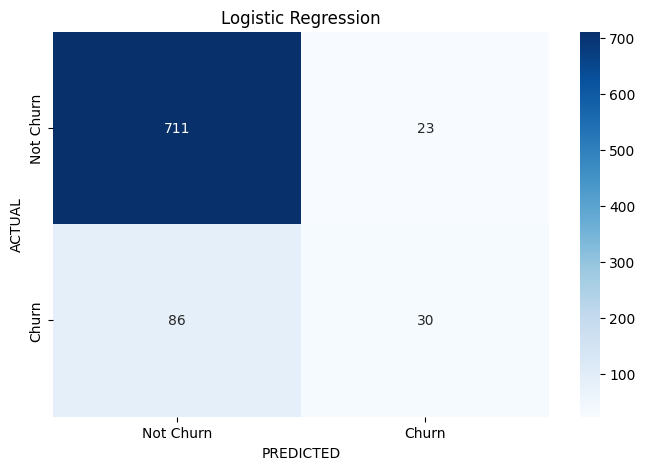

In [ ]:
labels = ['Not Churn', 'Churn']
print(classification_report(y_test, log_pred))
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, log_pred), annot=True, fmt='.0f', ax=ax, cmap='Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Logistic Regression')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL");

## Model Decision Tree to Predict Customer Churn

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

**Evaluasi Decision Tree**

In [ ]:
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 0.96


              precision    recall  f1-score   support

           0       0.98      0.97      0.98       734
           1       0.83      0.90      0.86       116

    accuracy                           0.96       850
   macro avg       0.90      0.93      0.92       850
weighted avg       0.96      0.96      0.96       850



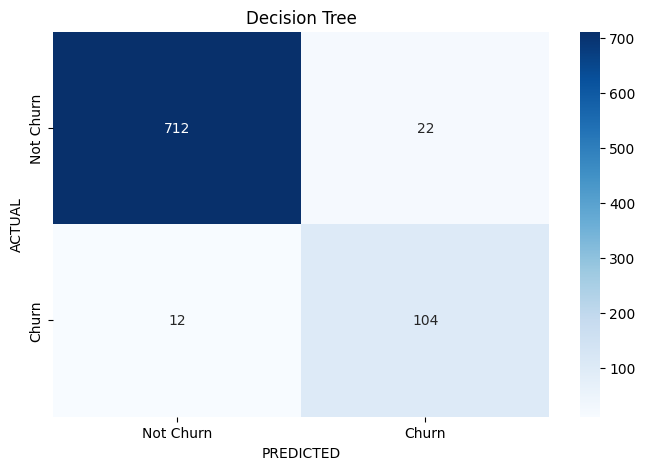

In [ ]:
labels = ['Not Churn', 'Churn']
print(classification_report(y_test, dt_pred))
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='.0f', ax=ax, cmap='Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Decision Tree')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL");

# Loading datatest

In [ ]:
from google.colab import files
datatest = files.upload()

Saving Data Test.csv to Data Test.csv


In [ ]:
df1 = pd.read_csv(io.StringIO(datatest['Data Test.csv'].decode('utf-8')))
df1.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             750 non-null    int64  
 1   state                          750 non-null    object 
 2   account_length                 750 non-null    int64  
 3   area_code                      750 non-null    object 
 4   international_plan             750 non-null    object 
 5   voice_mail_plan                750 non-null    object 
 6   number_vmail_messages          750 non-null    int64  
 7   total_day_minutes              750 non-null    float64
 8   total_day_calls                750 non-null    int64  
 9   total_day_charge               750 non-null    float64
 10  total_eve_minutes              750 non-null    float64
 11  total_eve_calls                750 non-null    int64  
 12  total_eve_charge               750 non-null    flo

## Cleaning Data Test

In [ ]:
df1['total_minutes'] = df1['total_day_minutes'] + df1['total_eve_minutes'] + df1['total_night_minutes']
df1['total_calls'] = df1['total_day_calls'] + df1['total_eve_calls'] + df1['total_night_calls']
df1['total_charge'] = df1['total_day_charge'] + df1['total_eve_charge'] + df1['total_night_charge']

df1['voice_mail_plan'] = df1['voice_mail_plan'].map({'yes': 1, 'no': 0}) 
df1['international_plan'] = df1['international_plan'].map({'yes': 1, 'no': 0})

df1.drop(columns= ['id', 'state', 'area_code'], inplace= True)

df1.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
                 'total_day_calls','total_eve_calls', 'total_night_calls', 
                 'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [ ]:
df1.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96


## Data Test using Decision Tree Model

In [ ]:
Xtest = df1

In [ ]:
df1['churn'] = dt_model.predict(Xtest)

In [ ]:
df1

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,churn
0,128,0,1,25,10.0,3,2.70,1,707.2,300,72.86,0
1,118,1,0,0,6.3,6,1.70,0,647.9,317,65.91,0
2,62,0,0,0,13.1,6,3.54,4,630.9,245,55.77,0
3,93,0,0,0,8.1,3,2.19,3,538.5,346,56.80,0
4,174,0,0,0,15.5,5,4.19,3,652.1,303,55.96,1
...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,11.3,7,3.05,0,548.4,307,48.66,0
746,73,0,0,0,12.3,2,3.32,3,689.5,314,63.99,0
747,152,0,0,0,14.7,2,3.97,3,654.6,276,62.75,0
748,61,0,0,0,13.6,4,3.67,1,525.8,314,48.15,0


In [ ]:
dt_churn_accuracy = accuracy_score(y_test[0:750:], df1['churn'])
print('Decision Tree Accuracy:', dt_churn_accuracy)

Decision Tree Accuracy: 0.748


              precision    recall  f1-score   support

           0       0.86      0.84      0.85       648
           1       0.14      0.17      0.15       102

    accuracy                           0.75       750
   macro avg       0.50      0.50      0.50       750
weighted avg       0.77      0.75      0.76       750



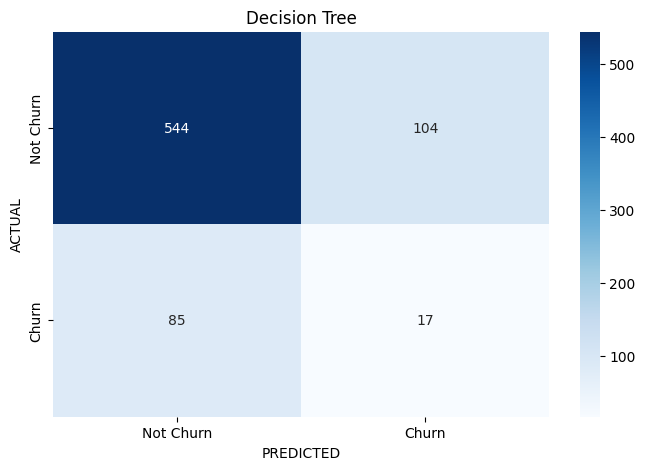

In [ ]:
labels = ['Not Churn', 'Churn']
print(classification_report(y_test[0:750:], df1['churn']))
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test[0:750:], df1['churn']), annot=True, fmt='.0f', ax=ax, cmap='Blues')

ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

plt.title('Decision Tree')
plt.xlabel("PREDICTED")
plt.ylabel("ACTUAL");